### Getting the Parts of a File Path

Given a Path object, you can extract the file path's diff parts as strings using Path object attributes. Useful for constructing new file paths based on existing ones

![Screenshot 2024-01-17 145505.png](<attachment:Screenshot 2024-01-17 145505.png>)
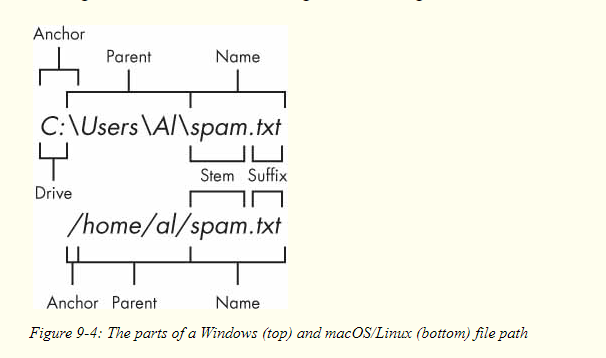

The parts of a file path include:

- Anchor -> root folder of the file system
- Drive (Windows) -> single letter that's often a physical hard drive or storage device
- Parent -> folder containing the file
- Name -> name of the file, made of stem (base name) and suffix (extension)

Windows Path objects have a drive attribute. MacOS/Linux don't. Drive attribute doesn't include the first backslash

In [6]:
from pathlib import Path

p = Path('C:/Users/slakk/spam.txt')
p.anchor
p.parent
p.name
p.stem
p.suffix
p.drive

'C:'

These attributes evalute to simple string values, except for parent which evalutes to another Path object.

The parents attribute (different from parent attribute) evaluates to the ancestor folders of a Path object with an integer index:

In [11]:
Path.cwd()
Path.cwd().parents[0]
Path.cwd().parents[1]
Path.cwd().parents[2]
# etc.

WindowsPath('c:/Users/slakk/OneDrive')

The older os.path module also has similar functions for getting the different parts of a path written in a string value.

os.path.dirname(path) returns a string of everything that comes before the last slash in the path argument.

os.path.basename(path) returns a string of everything that comes after the last slash in the path argument.

![Screenshot 2024-01-17 152103.png](<attachment:Screenshot 2024-01-17 152103.png>)
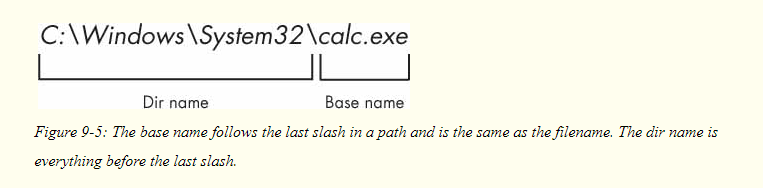

In [14]:
import os
from pathlib import Path

calcFilePath = 'C:\\Windows\\System32\\calc.exe'
os.path.basename(calcFilePath)
os.path.dirname(calcFilePath)

'C:\\Windows\\System32'

Need path's dir name and base name together?

os.path.split() gives a tuple value with these two strings:

In [16]:
caclFilePath = 'C:\\Windows\\System32\\calc.exe'
os.path.split(calcFilePath)

('C:\\Windows\\System32', 'calc.exe')

os.path.split() does not take a file path and return a list of strings of each folder. For that, use the split() string method and split on the string in os.sep. The os.sep variable is set to the correct folder-separating lsash for the computer runnign the program (Windows vs. Mac/Linus). Splitting on it will return a list of the individual folders.

In [18]:
calcFilePath.split(os.sep)

['C:', 'Windows', 'System32', 'calc.exe']

This returns all the parts of the path as strings. The split() string method works to return a list of each part of the path.

### Finding File Sizes and Folder Contents

Once we have ways of handling file paths, we can start gathering info about specific files and folders. os.path module provides functions for finding size of file in bytes, as well as finding files and folders inside give folder:

- os.path.getsize(path) -> returns the size in bytes of the file in the path argument
- os.listdir(path) returns list of filename strings for each file in the path argument (note: inside os module, not os.path)

In [21]:
os.path.getsize('C:\\Windows\\System32\\calc.exe')
os.listdir('C:\\Windows\\System32')

['0409',
 '0ae3b998-9a38-4b72-a4c4-06849441518d_Servicing-Stack.dll',
 '4545ffe2-0dc4-4df4-9d02-299ef204635e_hvsocket.dll',
 '69fe178f-26e7-43a9-aa7d-2b616b672dde_eventlogservice.dll',
 '6bea57fb-8dfb-4177-9ae8-42e8b3529933_RuntimeDeviceInstall.dll',
 '@AdvancedKeySettingsNotification.png',
 '@AppHelpToast.png',
 '@AudioToastIcon.png',
 '@BackgroundAccessToastIcon.png',
 '@bitlockertoastimage.png',
 '@edptoastimage.png',
 '@EnrollmentToastIcon.png',
 '@facial-recognition-windows-hello.gif',
 '@language_notification_icon.png',
 '@optionalfeatures.png',
 '@StorageSenseToastIcon.png',
 '@VpnToastIcon.png',
 '@WindowsHelloFaceToastIcon.png',
 '@WindowsUpdateToastIcon.contrast-black.png',
 '@WindowsUpdateToastIcon.contrast-white.png',
 '@WindowsUpdateToastIcon.png',
 '@WirelessDisplayToast.png',
 '@WLOGO_96x96.png',
 'A-Volute',
 'aadauthhelper.dll',
 'aadcloudap.dll',
 'aadjcsp.dll',
 'aadtb.dll',
 'aadWamExtension.dll',
 'AarSvc.dll',
 'AboutSettingsHandlers.dll',
 'AboveLockAppHost.dll',

The calc.exe program is ____ bytes in size, and there's alot of files in system32. To find total size of all the files in the directory, use these attributes together:

In [23]:
totalSize = 0
for filename in os.listdir('C:\\Windows\\System32'):
    totalSize = totalSize + os.path.getsize(os.path.join('C:\\Windows\\System32', filename))
print(totalSize)

2390677639


While looping over each filename in System32 folder, totalSize variable is incremented by the size of each file. When calling os.path.getsize(), use os.path.join() to join folder name with current file name. Integer that os.path.getsize() returns is added to the value of totalSize. After looping through all files, print totalSize.